<a href="https://colab.research.google.com/github/Mayar215999/data-science-project/blob/main/IBM_DATA_ANALYSIS_MODULE_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install pandas
!pip install matplotlib

In [2]:
import pandas as pd

In [3]:
import matplotlib.pyplot as plt

In [4]:
# Load the dataset directly from the URL
file_path = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/VYPrOu0Vs3I0hKLLjiPGrA/survey-data-with-duplicate.csv"
df = pd.read_csv(file_path)

# Display the first few rows
print(df.head())

   ResponseId                      MainBranch                 Age  \
0           1  I am a developer by profession  Under 18 years old   
1           2  I am a developer by profession     35-44 years old   
2           3  I am a developer by profession     45-54 years old   
3           4           I am learning to code     18-24 years old   
4           5  I am a developer by profession     18-24 years old   

            Employment RemoteWork   Check  \
0  Employed, full-time     Remote  Apples   
1  Employed, full-time     Remote  Apples   
2  Employed, full-time     Remote  Apples   
3   Student, full-time        NaN  Apples   
4   Student, full-time        NaN  Apples   

                                    CodingActivities  \
0                                              Hobby   
1  Hobby;Contribute to open-source projects;Other...   
2  Hobby;Contribute to open-source projects;Other...   
3                                                NaN   
4                                 

In [5]:
# df = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv")

In [6]:
# Count duplicate rows
duplicate_count = df.duplicated().sum()

# Print the count
print(f"Number of duplicate rows: {duplicate_count}")

Number of duplicate rows: 20


In [7]:
# Get the first few duplicate rows
duplicate_rows = df[df.duplicated(keep=False)]

# Display the first 5 duplicate rows
print(duplicate_rows.head(5))

   ResponseId                      MainBranch                 Age  \
0           1  I am a developer by profession  Under 18 years old   
1           2  I am a developer by profession     35-44 years old   
2           3  I am a developer by profession     45-54 years old   
3           4           I am learning to code     18-24 years old   
4           5  I am a developer by profession     18-24 years old   

            Employment RemoteWork   Check  \
0  Employed, full-time     Remote  Apples   
1  Employed, full-time     Remote  Apples   
2  Employed, full-time     Remote  Apples   
3   Student, full-time        NaN  Apples   
4   Student, full-time        NaN  Apples   

                                    CodingActivities  \
0                                              Hobby   
1  Hobby;Contribute to open-source projects;Other...   
2  Hobby;Contribute to open-source projects;Other...   
3                                                NaN   
4                                 

In [9]:
# Specify the columns for duplication check
subset_columns = ['MainBranch', 'Employment', 'RemoteWork']

# Find duplicate rows based on the subset of columns
duplicate_rows = df[df.duplicated(subset=subset_columns, keep=False)]

# Display the first few duplicate rows
print(duplicate_rows.head())

# Analyze frequency of identical values in other columns
for column in df.columns:
    if column not in subset_columns:
        # Calculate the percentage of identical values for each column
        identical_percentage = (duplicate_rows.groupby(subset_columns)[column].nunique() == 1).mean() * 100
        print(f"Column '{column}': {identical_percentage:.2f}% identical values in duplicate rows")

   ResponseId                      MainBranch                 Age  \
0           1  I am a developer by profession  Under 18 years old   
1           2  I am a developer by profession     35-44 years old   
2           3  I am a developer by profession     45-54 years old   
3           4           I am learning to code     18-24 years old   
4           5  I am a developer by profession     18-24 years old   

            Employment RemoteWork   Check  \
0  Employed, full-time     Remote  Apples   
1  Employed, full-time     Remote  Apples   
2  Employed, full-time     Remote  Apples   
3   Student, full-time        NaN  Apples   
4   Student, full-time        NaN  Apples   

                                    CodingActivities  \
0                                              Hobby   
1  Hobby;Contribute to open-source projects;Other...   
2  Hobby;Contribute to open-source projects;Other...   
3                                                NaN   
4                                 

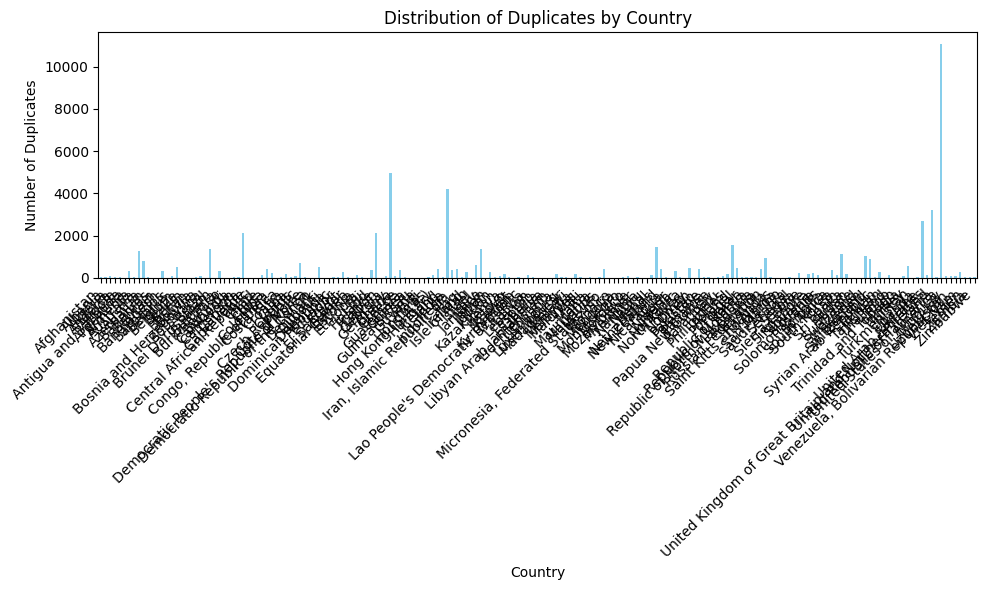

In [12]:
import matplotlib.pyplot as plt

# Filter for duplicate rows based on specified columns
subset_columns = ['MainBranch', 'Employment', 'RemoteWork']
duplicate_rows = df[df.duplicated(subset=subset_columns, keep=False)]

# **Check if 'Respondent' column exists in duplicate_rows**
if 'Respondent' not in duplicate_rows.columns:
    # **If not found, assume 'ResponseId' is the intended column and rename it**
    duplicate_rows = duplicate_rows.rename(columns={'ResponseId': 'Respondent'})
    # **Alternatively if the column name is known, correct it here.**

# Group by 'Country' and count duplicates
country_duplicates = duplicate_rows.groupby('Country')['Respondent'].count()

# Create the bar chart
plt.figure(figsize=(10, 6))  # Adjust figure size if needed
country_duplicates.plot(kind='bar', color='skyblue')
plt.title('Distribution of Duplicates by Country')
plt.xlabel('Country')
plt.ylabel('Number of Duplicates')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

<ipython-input-14-5dcdba297c75>:10: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


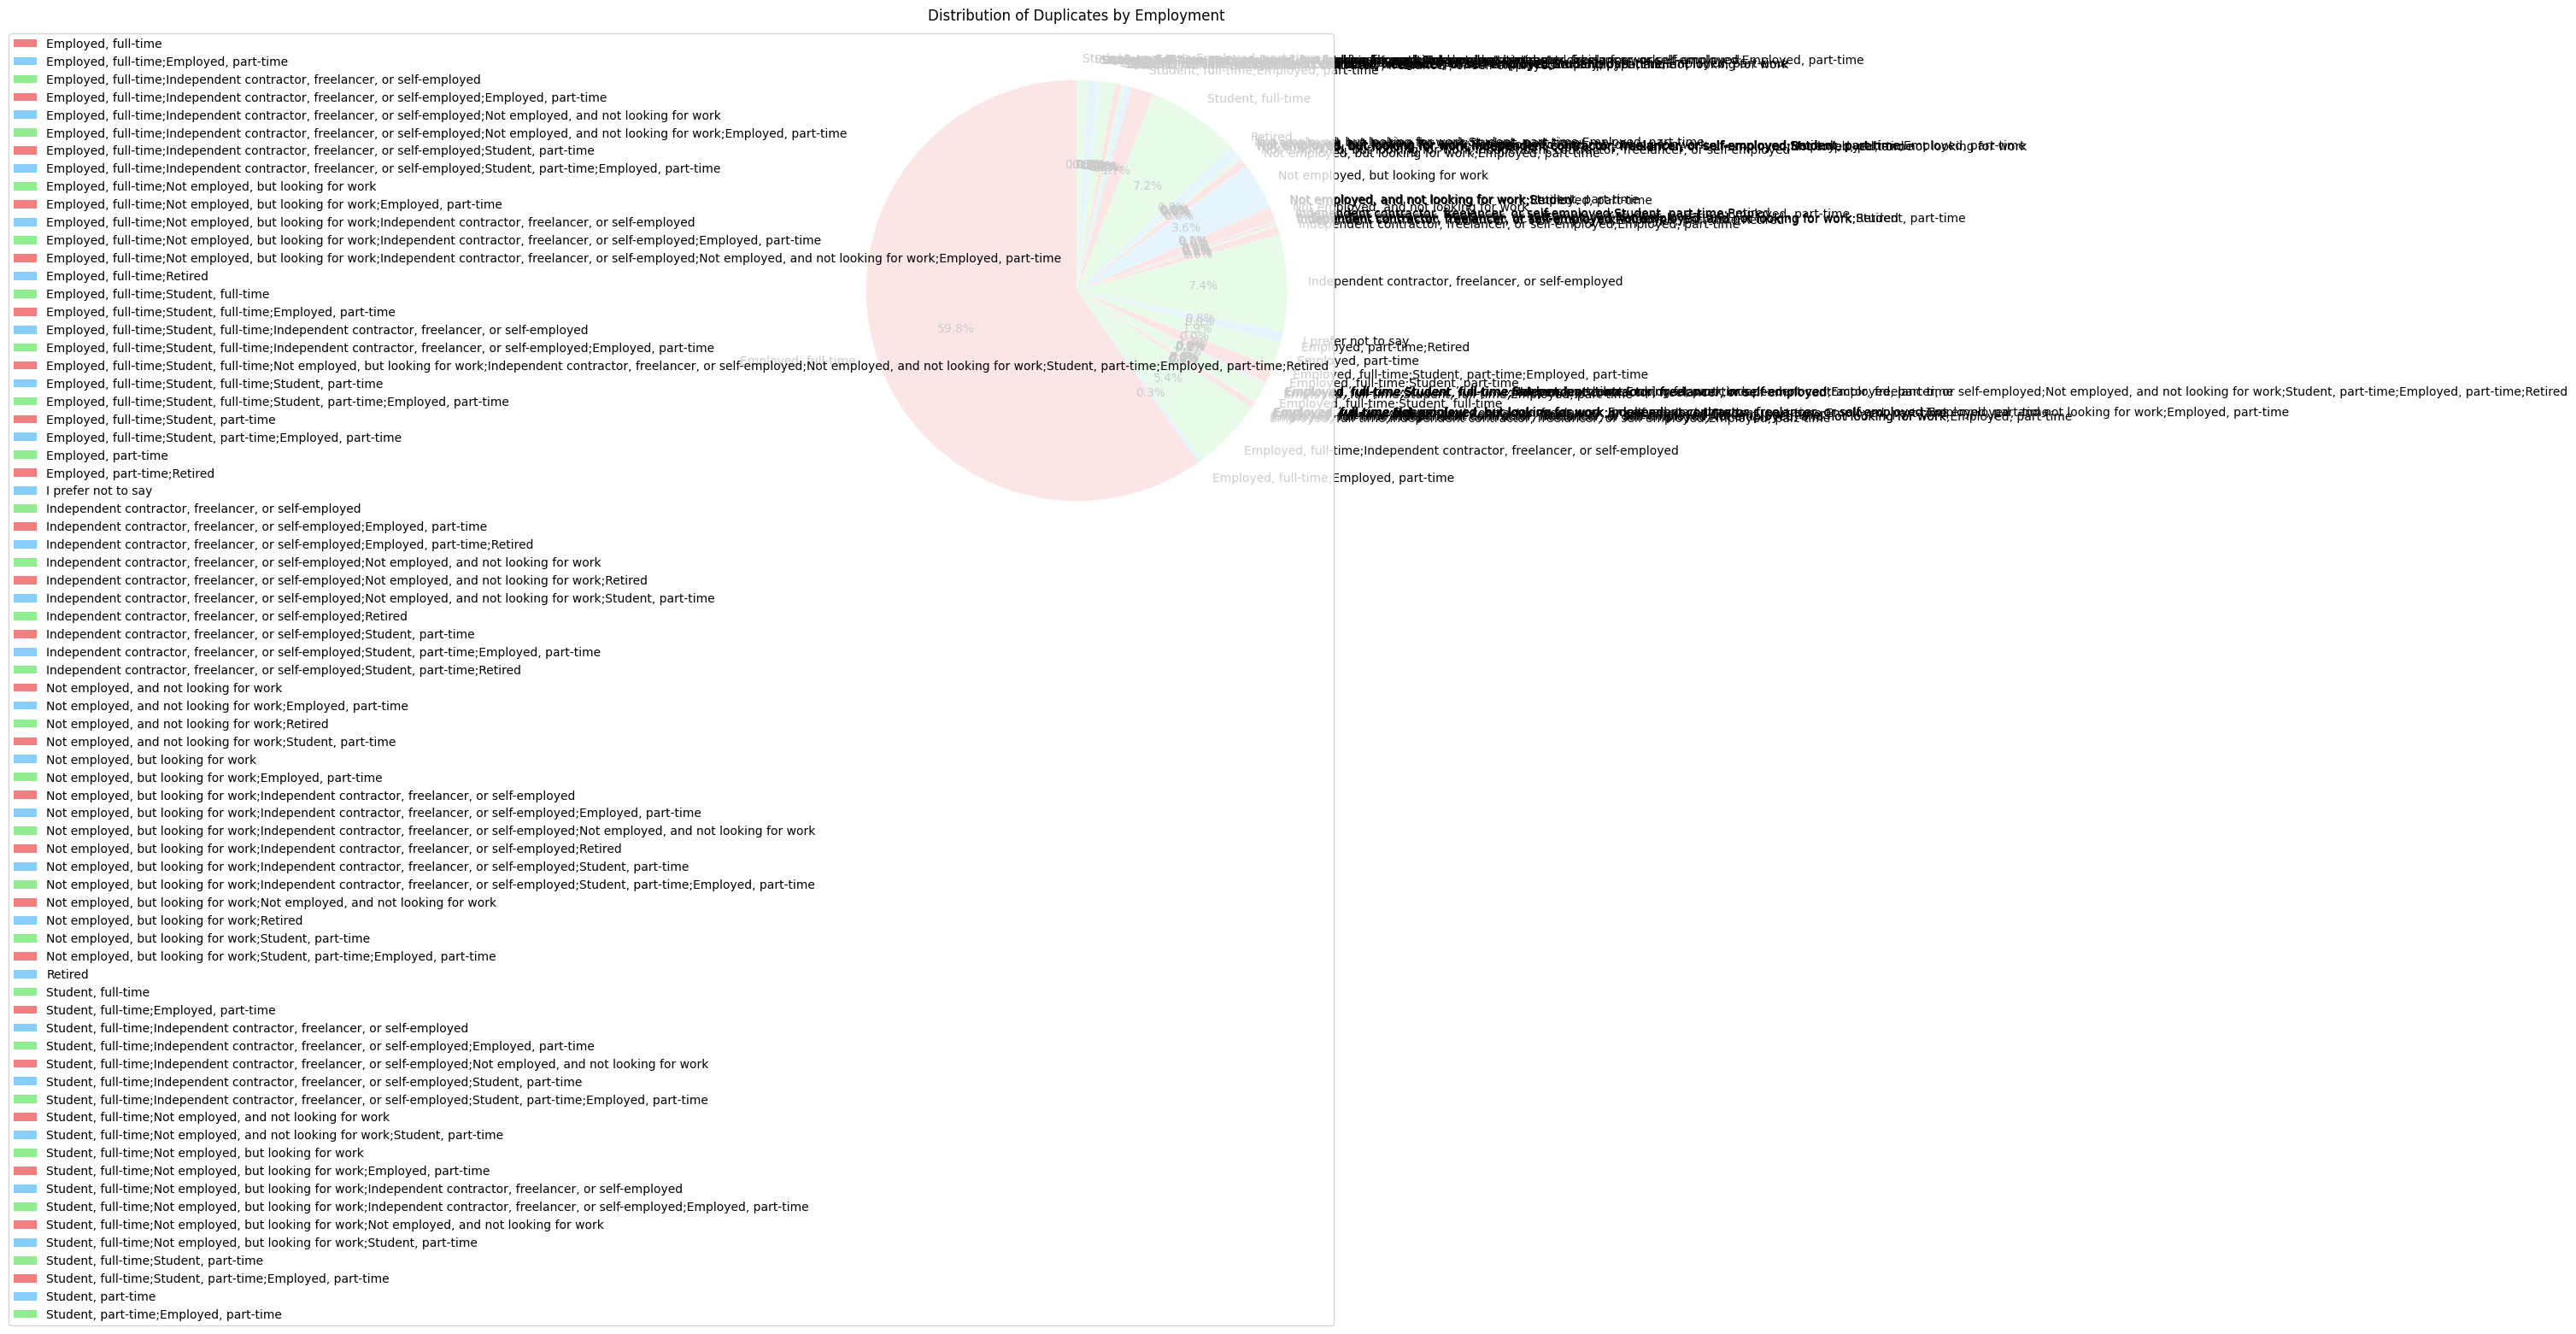

In [14]:
# Group by 'Employment' and count duplicates
employment_duplicates = duplicate_rows.groupby('Employment')['Respondent'].count()  # Changed 'ResponseId' to 'Respondent'

# Create the pie chart
plt.figure(figsize=(8, 8))  # Adjust figure size if needed
employment_duplicates.plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=['lightcoral', 'lightskyblue', 'lightgreen'])
plt.title('Distribution of Duplicates by Employment')
plt.ylabel('')  # Remove the default ylabel
plt.legend(loc='best')  # Add a legend
plt.tight_layout()
plt.show()

In [15]:
# Load the dataset
file_path = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/VYPrOu0Vs3I0hKLLjiPGrA/survey-data-with-duplicate.csv"
df = pd.read_csv(file_path)

# Count duplicate rows
duplicate_count = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicate_count}")

Number of duplicate rows: 20


In [16]:
# Specify the columns for duplication check
subset_columns = ['MainBranch', 'Employment', 'RemoteWork']

# Find duplicate rows based on the subset of columns
duplicate_rows = df[df.duplicated(subset=subset_columns, keep=False)]

In [17]:
# Analyze frequency of identical values in other columns
for column in df.columns:
    if column not in subset_columns:
        identical_percentage = (duplicate_rows.groupby(subset_columns)[column].nunique() == 1).mean() * 100
        print(f"Column '{column}': {identical_percentage:.2f}% identical values in duplicate rows")

Column 'ResponseId': 0.00% identical values in duplicate rows
Column 'Age': 9.40% identical values in duplicate rows
Column 'Check': 100.00% identical values in duplicate rows
Column 'CodingActivities': 0.31% identical values in duplicate rows
Column 'EdLevel': 7.21% identical values in duplicate rows
Column 'LearnCode': 3.76% identical values in duplicate rows
Column 'LearnCodeOnline': 10.34% identical values in duplicate rows
Column 'TechDoc': 18.18% identical values in duplicate rows
Column 'YearsCode': 4.08% identical values in duplicate rows
Column 'YearsCodePro': 2.51% identical values in duplicate rows
Column 'DevType': 5.64% identical values in duplicate rows
Column 'OrgSize': 6.27% identical values in duplicate rows
Column 'PurchaseInfluence': 8.78% identical values in duplicate rows
Column 'BuyNewTool': 2.19% identical values in duplicate rows
Column 'BuildvsBuy': 9.72% identical values in duplicate rows
Column 'TechEndorse': 2.51% identical values in duplicate rows
Column 'C

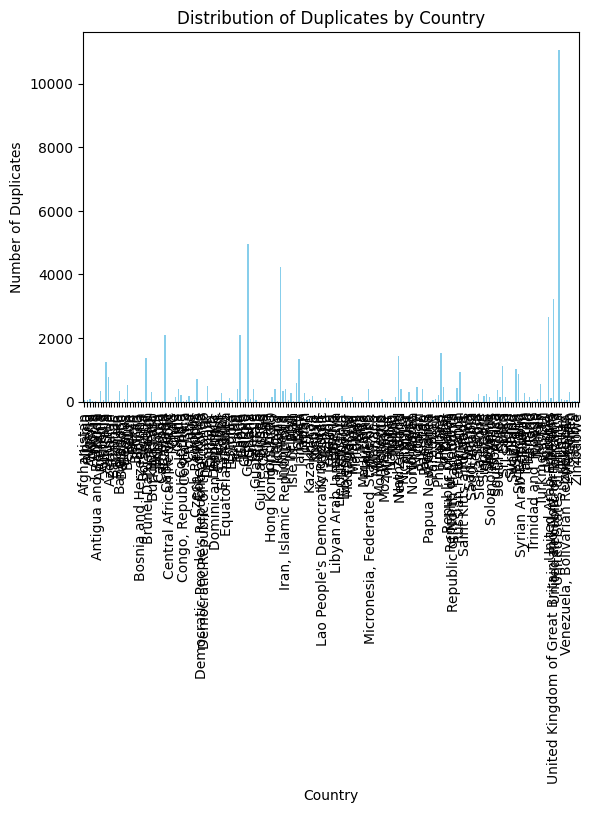

In [19]:
# Example for visualizing by Country (similar code was used for Employment):
import matplotlib.pyplot as plt

# Check if 'Respondent' column exists, if not, assume it's 'ResponseId'
if 'Respondent' not in duplicate_rows.columns:
    duplicate_rows = duplicate_rows.rename(columns={'ResponseId': 'Respondent'})

country_duplicates = duplicate_rows.groupby('Country')['Respondent'].count()
country_duplicates.plot(kind='bar', color='skyblue')
plt.title('Distribution of Duplicates by Country')
plt.xlabel('Country')
plt.ylabel('Number of Duplicates')
plt.show()

Reasoning Behind Column Selection for Duplicate Removal
When dealing with duplicate data, it's crucial to choose the right columns to base the identification on. This choice directly impacts which rows are considered duplicates and ultimately removed. Here's a breakdown of the rationale behind this selection:

Data Integrity:

Primary Keys: Ideally, datasets have primary keys (unique identifiers) that should never be duplicated. If a primary key is duplicated, it often indicates a data entry error or a deeper issue in the data collection process.
Functional Dependencies: Some columns might be functionally dependent on others. For example, in a survey, a respondent's email address might uniquely determine their other responses. In this case, focusing on the email address column for duplicate detection would make sense.
Business Logic:

Relevant Attributes: The choice of columns should align with the business context. For instance, if you're analyzing customer data, identifying duplicates based on name and address might be more important than other attributes like purchase history.
Desired Outcome: The goal of duplicate removal should be considered. If the aim is to have a single, accurate record for each unique individual, then columns that represent individual identity (name, email, etc.) should be prioritized.
Practical Considerations:

Data Volume: Checking for duplicates across all columns can be computationally expensive, especially for large datasets. Selecting a subset of key columns can significantly improve performance.
Data Quality: The quality of data in different columns can vary. Some columns might have more errors or missing values, making them less reliable for duplicate detection. Choosing columns with higher data quality improves the accuracy of the process.
Example:

In the user's code, they chose ['MainBranch', 'Employment', 'RemoteWork'] as the subset_columns. This likely stems from the assumption that these three attributes together define a unique respondent for their specific analysis purpose. If two respondents share the same values for these columns, they might be considered duplicates even if their answers to other survey questions differ.

In essence, selecting the right columns for identifying duplicates is a balance between:

Accurately reflecting the meaning of 'duplicate' in the specific context.
Ensuring the efficiency and feasibility of the process.
Maintaining the integrity and usefulness of the resulting data.

In [20]:
!pip install pandas

In [21]:
import pandas as pd

In [22]:
# Define the URL of the dataset
file_path = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv"

# Load the dataset into a DataFrame
df = pd.read_csv(file_path)

# Display the first few rows to ensure it loaded correctly
print(df.head())

   ResponseId                      MainBranch                 Age  \
0           1  I am a developer by profession  Under 18 years old   
1           2  I am a developer by profession     35-44 years old   
2           3  I am a developer by profession     45-54 years old   
3           4           I am learning to code     18-24 years old   
4           5  I am a developer by profession     18-24 years old   

            Employment RemoteWork   Check  \
0  Employed, full-time     Remote  Apples   
1  Employed, full-time     Remote  Apples   
2  Employed, full-time     Remote  Apples   
3   Student, full-time        NaN  Apples   
4   Student, full-time        NaN  Apples   

                                    CodingActivities  \
0                                              Hobby   
1  Hobby;Contribute to open-source projects;Other...   
2  Hobby;Contribute to open-source projects;Other...   
3                                                NaN   
4                                 

In [23]:
df = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv")

In [24]:
import pandas as pd

# Load the dataset
file_path = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/VYPrOu0Vs3I0hKLLjiPGrA/survey-data-with-duplicate.csv"
df = pd.read_csv(file_path)

# Count duplicate rows
duplicate_count = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicate_count}")

# Display the first few duplicate rows
duplicate_rows = df[df.duplicated(keep=False)]  # keep=False to show all duplicates
print(duplicate_rows.head())

Number of duplicate rows: 20
   ResponseId                      MainBranch                 Age  \
0           1  I am a developer by profession  Under 18 years old   
1           2  I am a developer by profession     35-44 years old   
2           3  I am a developer by profession     45-54 years old   
3           4           I am learning to code     18-24 years old   
4           5  I am a developer by profession     18-24 years old   

            Employment RemoteWork   Check  \
0  Employed, full-time     Remote  Apples   
1  Employed, full-time     Remote  Apples   
2  Employed, full-time     Remote  Apples   
3   Student, full-time        NaN  Apples   
4   Student, full-time        NaN  Apples   

                                    CodingActivities  \
0                                              Hobby   
1  Hobby;Contribute to open-source projects;Other...   
2  Hobby;Contribute to open-source projects;Other...   
3                                                NaN   
4    

In [25]:
import pandas as pd

# Load the dataset
file_path = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/VYPrOu0Vs3I0hKLLjiPGrA/survey-data-with-duplicate.csv"
df = pd.read_csv(file_path)

# Remove duplicate rows
df_no_duplicates = df.drop_duplicates(keep='first') #keep='first' to keep the first occurrence of each unique row

# Verify removal by counting duplicate rows
duplicate_count_after_removal = df_no_duplicates.duplicated().sum()
print(f"Number of duplicate rows after removal: {duplicate_count_after_removal}")

Number of duplicate rows after removal: 0


In [26]:
import pandas as pd

# Load the dataset
file_path = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/VYPrOu0Vs3I0hKLLjiPGrA/survey-data-with-duplicate.csv"
df = pd.read_csv(file_path)

# Identify missing values for all columns
missing_values = df.isnull().sum()
print("Missing values per column:\n", missing_values)

# Impute missing values in 'EdLevel' with the most frequent value
# Get the most frequent value (mode)
most_frequent_edlevel = df['EdLevel'].mode()[0]

# Impute missing values
df['EdLevel'].fillna(most_frequent_edlevel, inplace=True)

# Verify imputation by checking missing values in 'EdLevel' again
missing_edlevel_after_imputation = df['EdLevel'].isnull().sum()
print(f"\nMissing values in 'EdLevel' after imputation: {missing_edlevel_after_imputation}")

Missing values per column:
 ResponseId                 0
MainBranch                 0
Age                        0
Employment                 0
RemoteWork             10637
                       ...  
JobSatPoints_11        36006
SurveyLength            9259
SurveyEase              9202
ConvertedCompYearly    42020
JobSat                 36326
Length: 114, dtype: int64

Missing values in 'EdLevel' after imputation: 0


<ipython-input-26-5d8426f1cbe7>:16: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['EdLevel'].fillna(most_frequent_edlevel, inplace=True)


In [27]:
import pandas as pd

# Load the dataset
file_path = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/VYPrOu0Vs3I0hKLLjiPGrA/survey-data-with-duplicate.csv"
df = pd.read_csv(file_path)

# Check for missing values in 'ConvertedCompYearly'
missing_comp = df['ConvertedCompYearly'].isnull().sum()
print(f"Missing values in 'ConvertedCompYearly': {missing_comp}")

# Handle missing values (if any) - Choose an appropriate method
# For example, impute with the median:
if missing_comp > 0:
    median_comp = df['ConvertedCompYearly'].median()
    df['ConvertedCompYearly'].fillna(median_comp, inplace=True)
    print(f"Missing values in 'ConvertedCompYearly' after imputation: {df['ConvertedCompYearly'].isnull().sum()}")
else:
    print("No missing values in 'ConvertedCompYearly'.")

# Now you can use 'ConvertedCompYearly' for compensation analysis.
# ... (Your analysis code here) ...

Missing values in 'ConvertedCompYearly': 42020
Missing values in 'ConvertedCompYearly' after imputation: 0


<ipython-input-27-a3b1e54991a2>:15: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['ConvertedCompYearly'].fillna(median_comp, inplace=True)


Summary
In this lab, we performed the following key data cleaning tasks:

Identifying and Removing Duplicate Rows:

We identified and counted the number of duplicate rows in the dataset.
We used the drop_duplicates() function to remove the duplicates, keeping only the first occurrence of each unique row.
Handling Missing Values:

We identified missing values in all columns of the dataset using isnull().sum().
We focused on the 'EdLevel' column and imputed missing values with the most frequent value (mode) using fillna().
Normalizing Compensation Data:

We identified the 'ConvertedCompYearly' column as the normalized annual compensation.
We checked for and handled missing values in this column, imputing with the median value as an example.
Next Steps for Further Analysis
With the initial data cleaning steps completed, you can now proceed with more in-depth analysis and exploration of the dataset. Here are some potential next steps:

Explore Other Columns:

Investigate other columns in the dataset for potential data quality issues, such as inconsistencies, outliers, or invalid values.
Apply appropriate cleaning techniques to address these issues, similar to how we handled missing values in 'EdLevel' and 'ConvertedCompYearly'.
Visualize the Cleaned Dataset:

Create visualizations (e.g., histograms, box plots, scatter plots) to gain insights into the distributions of different variables and relationships between them.
Use these visualizations to identify patterns, trends, and potential areas for further investigation.
Perform Statistical Analysis:

Calculate descriptive statistics (e.g., mean, median, standard deviation) for key variables to summarize the data.
Conduct inferential statistical tests to explore relationships between variables and draw conclusions about the population.
Feature Engineering:

Create new features from existing ones to potentially improve the performance of machine learning models or gain deeper insights.
For example, you could create categories based on age ranges, combine related columns, or extract relevant information from text fields.
Machine Learning Modeling (if applicable):

If your goal is to build predictive models, you can now use the cleaned and prepared data to train and evaluate machine learning algorithms.
Choose appropriate models based on the type of problem you're solving (e.g., classification, regression) and the characteristics of your data.

##Finding Missing Values##

In [28]:
!pip install pandas
!pip install matplotlib
!pip install seaborn

In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [30]:
# Define the URL of the dataset
file_path = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv"

# Load the dataset into a DataFrame
df = pd.read_csv(file_path)

# Display the first few rows to ensure it loaded correctly
print(df.head())

   ResponseId                      MainBranch                 Age  \
0           1  I am a developer by profession  Under 18 years old   
1           2  I am a developer by profession     35-44 years old   
2           3  I am a developer by profession     45-54 years old   
3           4           I am learning to code     18-24 years old   
4           5  I am a developer by profession     18-24 years old   

            Employment RemoteWork   Check  \
0  Employed, full-time     Remote  Apples   
1  Employed, full-time     Remote  Apples   
2  Employed, full-time     Remote  Apples   
3   Student, full-time        NaN  Apples   
4   Student, full-time        NaN  Apples   

                                    CodingActivities  \
0                                              Hobby   
1  Hobby;Contribute to open-source projects;Other...   
2  Hobby;Contribute to open-source projects;Other...   
3                                                NaN   
4                                 

In [31]:
import pandas as pd

# Load the dataset
file_path = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/VYPrOu0Vs3I0hKLLjiPGrA/survey-data-with-duplicate.csv"
df = pd.read_csv(file_path)

# Display basic information
print("Basic information about the dataset:")
print(df.info())

# Display summary statistics
print("\nSummary statistics:")
print(df.describe())

Basic information about the dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65457 entries, 0 to 65456
Columns: 114 entries, ResponseId to JobSat
dtypes: float64(13), int64(1), object(100)
memory usage: 56.9+ MB
None

Summary statistics:
         ResponseId      CompTotal       WorkExp  JobSatPoints_1  \
count  65457.000000   3.374400e+04  29664.000000    29330.000000   
mean   32714.493591  2.963490e+145     11.466323       18.578998   
std    18892.431636  5.443794e+147      9.168205       25.965347   
min        1.000000   0.000000e+00      0.000000        0.000000   
25%    16354.000000   6.000000e+04      4.000000        0.000000   
50%    32716.000000   1.100000e+05      9.000000       10.000000   
75%    49076.000000   2.500000e+05     16.000000       22.000000   
max    65437.000000  1.000000e+150     50.000000      100.000000   

       JobSatPoints_4  JobSatPoints_5  JobSatPoints_6  JobSatPoints_7  \
count    29399.000000    29417.000000    29456.000000    29454.000

In [32]:
import pandas as pd

# Load the dataset
file_path = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/VYPrOu0Vs3I0hKLLjiPGrA/survey-data-with-duplicate.csv"
df = pd.read_csv(file_path)

# Identify missing values for all columns
missing_values = df.isnull().sum()

# Display the results
print("Missing values per column:\n", missing_values)

Missing values per column:
 ResponseId                 0
MainBranch                 0
Age                        0
Employment                 0
RemoteWork             10637
                       ...  
JobSatPoints_11        36006
SurveyLength            9259
SurveyEase              9202
ConvertedCompYearly    42020
JobSat                 36326
Length: 114, dtype: int64


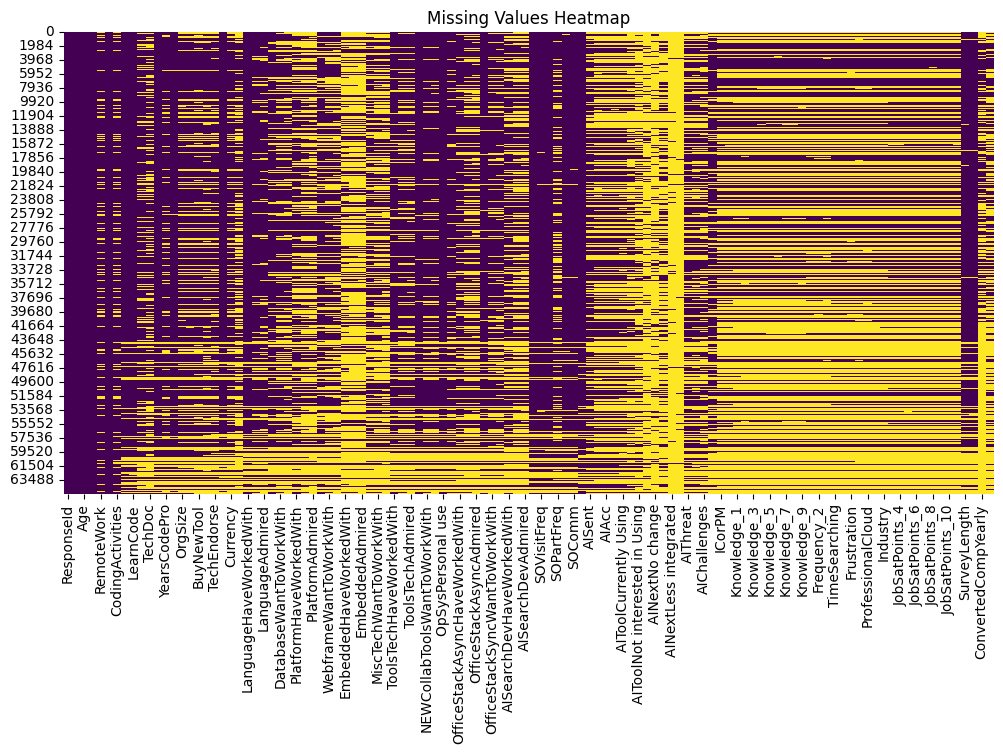

In [33]:
!pip install seaborn
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
file_path = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/VYPrOu0Vs3I0hKLLjiPGrA/survey-data-with-duplicate.csv"
df = pd.read_csv(file_path)

# Create the heatmap
plt.figure(figsize=(12, 6))  # Adjust figure size as needed
sns.heatmap(df.isnull(), cmap="viridis", cbar=False)
plt.title("Missing Values Heatmap")
plt.show()

In [34]:
import pandas as pd

# Load the dataset
file_path = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/VYPrOu0Vs3I0hKLLjiPGrA/survey-data-with-duplicate.csv"
df = pd.read_csv(file_path)

# Count missing values in 'Employment' column
missing_employment_count = df['Employment'].isnull().sum()

# Print the result
print(f"Number of missing rows in 'Employment' column: {missing_employment_count}")

Number of missing rows in 'Employment' column: 0


In [35]:
import pandas as pd

# Load the dataset
file_path = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/VYPrOu0Vs3I0hKLLjiPGrA/survey-data-with-duplicate.csv"
df = pd.read_csv(file_path)

# Get the most frequent value (mode)
most_frequent_employment = df['Employment'].mode()[0]

# Print the result
print(f"Most frequent value in 'Employment' column: {most_frequent_employment}")

Most frequent value in 'Employment' column: Employed, full-time


In [36]:
import pandas as pd

# Load the dataset
file_path = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/VYPrOu0Vs3I0hKLLjiPGrA/survey-data-with-duplicate.csv"
df = pd.read_csv(file_path)

# Get the most frequent value (mode)
most_frequent_employment = df['Employment'].mode()[0]

# Impute missing values
df['Employment'].fillna(most_frequent_employment, inplace=True)

# Verify imputation by checking for missing values again
missing_employment_after_imputation = df['Employment'].isnull().sum()
print(f"Missing values in 'Employment' after imputation: {missing_employment_after_imputation}")

Missing values in 'Employment' after imputation: 0


<ipython-input-36-6c8c80c54fe6>:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Employment'].fillna(most_frequent_employment, inplace=True)


<ipython-input-37-57c2ec23ab7f>:21: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


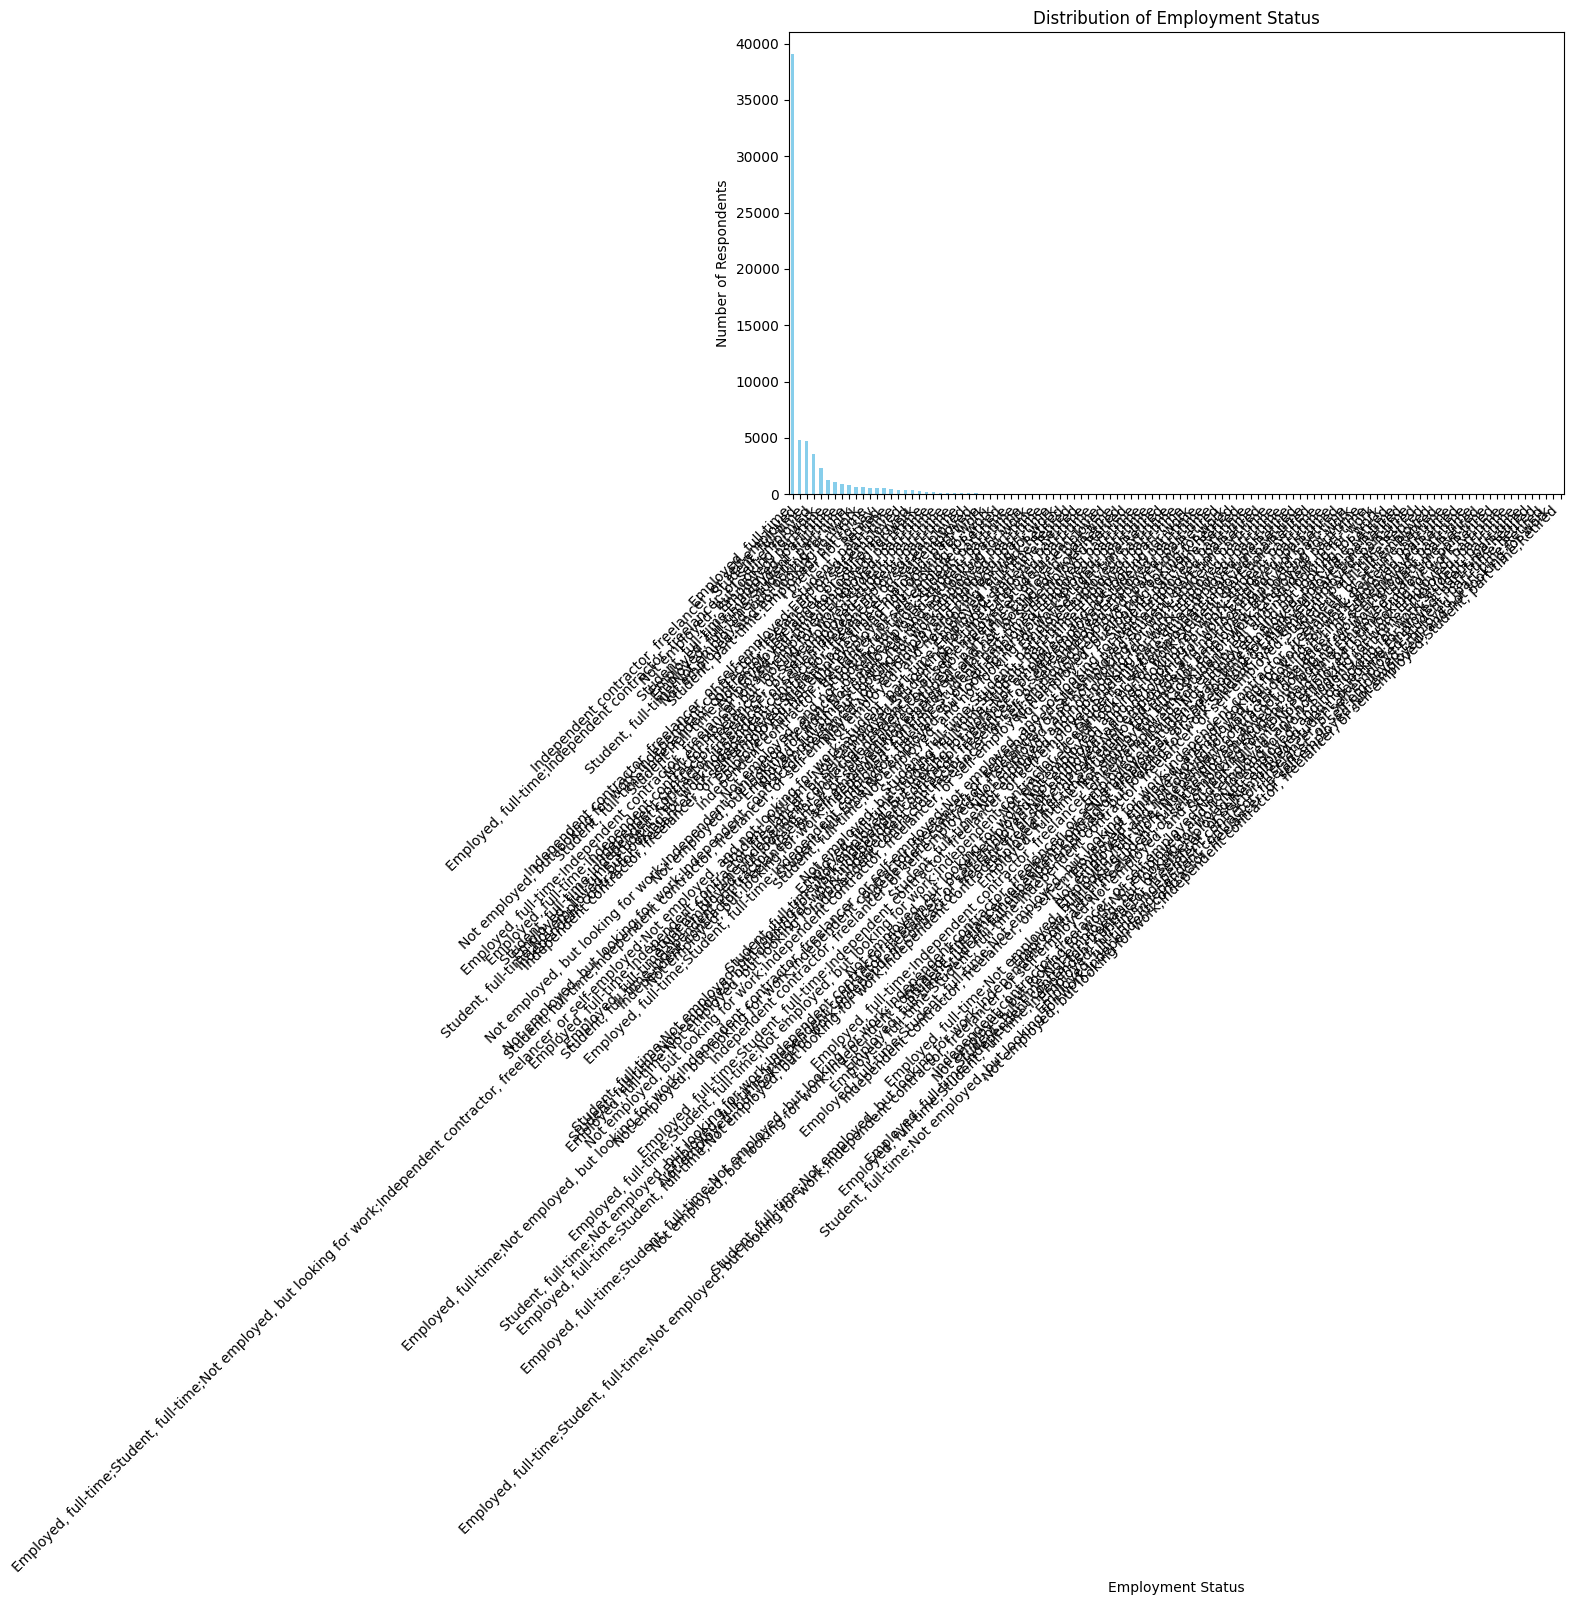

In [37]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
file_path = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/VYPrOu0Vs3I0hKLLjiPGrA/survey-data-with-duplicate.csv"
df = pd.read_csv(file_path)

# Impute missing values in 'Employment' (if any)
# (Assuming you've already done this in the previous step)

# Get the value counts for the 'Employment' column
employment_counts = df['Employment'].value_counts()

# Create the bar chart
plt.figure(figsize=(10, 6))  # Adjust figure size as needed
employment_counts.plot(kind='bar', color='skyblue')
plt.title('Distribution of Employment Status')
plt.xlabel('Employment Status')
plt.ylabel('Number of Respondents')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for readability
plt.tight_layout()
plt.show()

**Impute Missing Values**

In [38]:
!pip install pandas

In [39]:
import pandas as pd

In [40]:
file_path = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv"
df = pd.read_csv(file_path)

# Display the first few rows to ensure it loaded correctly
print(df.head())

   ResponseId                      MainBranch                 Age  \
0           1  I am a developer by profession  Under 18 years old   
1           2  I am a developer by profession     35-44 years old   
2           3  I am a developer by profession     45-54 years old   
3           4           I am learning to code     18-24 years old   
4           5  I am a developer by profession     18-24 years old   

            Employment RemoteWork   Check  \
0  Employed, full-time     Remote  Apples   
1  Employed, full-time     Remote  Apples   
2  Employed, full-time     Remote  Apples   
3   Student, full-time        NaN  Apples   
4   Student, full-time        NaN  Apples   

                                    CodingActivities  \
0                                              Hobby   
1  Hobby;Contribute to open-source projects;Other...   
2  Hobby;Contribute to open-source projects;Other...   
3                                                NaN   
4                                 

In [41]:
import pandas as pd

# Load the dataset
file_path = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/VYPrOu0Vs3I0hKLLjiPGrA/survey-data-with-duplicate.csv"
df = pd.read_csv(file_path)

# Find and display duplicate rows
duplicate_rows = df[df.duplicated(keep=False)]  # keep=False to show all duplicate instances
print("Duplicate Rows:")
print(duplicate_rows)

Duplicate Rows:
       ResponseId                                         MainBranch  \
0               1                     I am a developer by profession   
1               2                     I am a developer by profession   
2               3                     I am a developer by profession   
3               4                              I am learning to code   
4               5                     I am a developer by profession   
5               6                        I code primarily as a hobby   
6               7  I am not primarily a developer, but I write co...   
7               8                              I am learning to code   
8               9                        I code primarily as a hobby   
9              10                     I am a developer by profession   
9937         9938                     I am a developer by profession   
18521       18522                     I am a developer by profession   
22000       22001  I am not primarily a develope

In [42]:
import pandas as pd

# Load the dataset
file_path = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/VYPrOu0Vs3I0hKLLjiPGrA/survey-data-with-duplicate.csv"
df = pd.read_csv(file_path)

# Remove duplicate rows and keep the first occurrence
df_no_duplicates = df.drop_duplicates(keep='first')

# Display the shape of the DataFrame before and after removing duplicates
print("Shape of DataFrame before removing duplicates:", df.shape)
print("Shape of DataFrame after removing duplicates:", df_no_duplicates.shape)

Shape of DataFrame before removing duplicates: (65457, 114)
Shape of DataFrame after removing duplicates: (65437, 114)


In [43]:
import pandas as pd

# Load the dataset
file_path = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/VYPrOu0Vs3I0hKLLjiPGrA/survey-data-with-duplicate.csv"
df = pd.read_csv(file_path)

# Identify missing values for all columns
missing_values = df.isnull().sum()

# Display the results
print("Missing values per column:\n", missing_values)

Missing values per column:
 ResponseId                 0
MainBranch                 0
Age                        0
Employment                 0
RemoteWork             10637
                       ...  
JobSatPoints_11        36006
SurveyLength            9259
SurveyEase              9202
ConvertedCompYearly    42020
JobSat                 36326
Length: 114, dtype: int64


In [44]:
import pandas as pd

# Load the dataset
file_path = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/VYPrOu0Vs3I0hKLLjiPGrA/survey-data-with-duplicate.csv"
df = pd.read_csv(file_path)

# Count missing values in 'RemoteWork' column
missing_remote_work_count = df['RemoteWork'].isnull().sum()

# Print the result
print(f"Number of missing rows in 'RemoteWork' column: {missing_remote_work_count}")

Number of missing rows in 'RemoteWork' column: 10637


In [45]:
import pandas as pd

# Load the dataset
file_path = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/VYPrOu0Vs3I0hKLLjiPGrA/survey-data-with-duplicate.csv"
df = pd.read_csv(file_path)

# Get value counts for 'RemoteWork' column
remote_work_counts = df['RemoteWork'].value_counts()

# Display the value counts
print("Value counts for 'RemoteWork' column:\n", remote_work_counts)

Value counts for 'RemoteWork' column:
 RemoteWork
Hybrid (some remote, some in-person)    23018
Remote                                  20840
In-person                               10962
Name: count, dtype: int64


In [46]:
import pandas as pd

# Load the dataset
file_path = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/VYPrOu0Vs3I0hKLLjiPGrA/survey-data-with-duplicate.csv"
df = pd.read_csv(file_path)

# Get the most frequent value (mode)
most_frequent_remote_work = df['RemoteWork'].mode()[0]

# Print the result
print(f"Most frequent value in 'RemoteWork' column: {most_frequent_remote_work}")

Most frequent value in 'RemoteWork' column: Hybrid (some remote, some in-person)


In [47]:
import pandas as pd

# Load the dataset
file_path = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/VYPrOu0Vs3I0hKLLjiPGrA/survey-data-with-duplicate.csv"
df = pd.read_csv(file_path)

# Get the most frequent value (mode) for 'RemoteWork'
most_frequent_remote_work = df['RemoteWork'].mode()[0]

# Impute missing values in 'RemoteWork' with the mode
df['RemoteWork'].fillna(most_frequent_remote_work, inplace=True)

# Verify the imputation by checking for missing values again
missing_remote_work_after_imputation = df['RemoteWork'].isnull().sum()
print(f"Missing values in 'RemoteWork' after imputation: {missing_remote_work_after_imputation}")

Missing values in 'RemoteWork' after imputation: 0


<ipython-input-47-721a6431e0aa>:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['RemoteWork'].fillna(most_frequent_remote_work, inplace=True)


Compensation-related columns: ['CompTotal', 'AIComplex', 'ConvertedCompYearly']

Distribution of 'ConvertedCompYearly':
count    2.343700e+04
mean     8.615893e+04
std      1.867532e+05
min      1.000000e+00
25%      3.271200e+04
50%      6.500000e+04
75%      1.080000e+05
max      1.625660e+07
Name: ConvertedCompYearly, dtype: float64


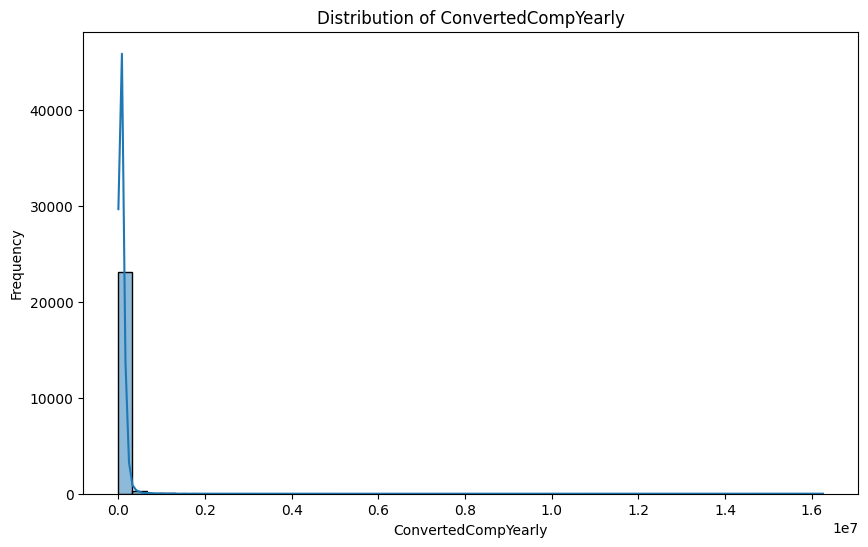

In [48]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/VYPrOu0Vs3I0hKLLjiPGrA/survey-data-with-duplicate.csv"
df = pd.read_csv(file_path)

# Identify compensation-related columns
compensation_columns = [col for col in df.columns if 'Comp' in col]
print("Compensation-related columns:", compensation_columns)

# Describe the distribution of 'ConvertedCompYearly' (example)
print("\nDistribution of 'ConvertedCompYearly':")
print(df['ConvertedCompYearly'].describe())

# Visualize the distribution using a histogram
plt.figure(figsize=(10, 6))
sns.histplot(df['ConvertedCompYearly'], bins=50, kde=True)
plt.title('Distribution of ConvertedCompYearly')
plt.xlabel('ConvertedCompYearly')
plt.ylabel('Frequency')
plt.show()

# You can explore other compensation-related columns similarly
# For example, to describe the distribution of 'CompTotal':
# print("\nDistribution of 'CompTotal':")
# print(df['CompTotal'].describe())
# # ... (visualization code for 'CompTotal') ...

**Data Normalization Techniques**

In [49]:
!pip install pandas

In [50]:
!pip install matplotlib

In [51]:
import pandas as pd
import matplotlib.pyplot as plt

In [52]:
file_path = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv"

df = pd.read_csv(file_path)

# Display the first few rows to check if data is loaded correctly
print(df.head())

   ResponseId                      MainBranch                 Age  \
0           1  I am a developer by profession  Under 18 years old   
1           2  I am a developer by profession     35-44 years old   
2           3  I am a developer by profession     45-54 years old   
3           4           I am learning to code     18-24 years old   
4           5  I am a developer by profession     18-24 years old   

            Employment RemoteWork   Check  \
0  Employed, full-time     Remote  Apples   
1  Employed, full-time     Remote  Apples   
2  Employed, full-time     Remote  Apples   
3   Student, full-time        NaN  Apples   
4   Student, full-time        NaN  Apples   

                                    CodingActivities  \
0                                              Hobby   
1  Hobby;Contribute to open-source projects;Other...   
2  Hobby;Contribute to open-source projects;Other...   
3                                                NaN   
4                                 

In [53]:
df = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv")

In [54]:
import pandas as pd

# Load the dataset
file_path = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/VYPrOu0Vs3I0hKLLjiPGrA/survey-data-with-duplicate.csv"
df = pd.read_csv(file_path)

# Identify duplicate rows
duplicate_rows = df[df.duplicated(keep=False)]
print("Duplicate Rows:")
print(duplicate_rows)

# Remove duplicate rows
df = df.drop_duplicates()

# Verify removal by counting duplicates (should be 0)
remaining_duplicates = df.duplicated().sum()
print(f"\nRemaining duplicates after removal: {remaining_duplicates}")

Duplicate Rows:
       ResponseId                                         MainBranch  \
0               1                     I am a developer by profession   
1               2                     I am a developer by profession   
2               3                     I am a developer by profession   
3               4                              I am learning to code   
4               5                     I am a developer by profession   
5               6                        I code primarily as a hobby   
6               7  I am not primarily a developer, but I write co...   
7               8                              I am learning to code   
8               9                        I code primarily as a hobby   
9              10                     I am a developer by profession   
9937         9938                     I am a developer by profession   
18521       18522                     I am a developer by profession   
22000       22001  I am not primarily a develope

In [55]:
import pandas as pd

# Load the dataset
file_path = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/VYPrOu0Vs3I0hKLLjiPGrA/survey-data-with-duplicate.csv"
df = pd.read_csv(file_path)

# Count missing values in 'CodingActivities' column
missing_coding_activities_count = df['CodingActivities'].isnull().sum()

# Print the result
print(f"Number of missing rows in 'CodingActivities' column: {missing_coding_activities_count}")

Number of missing rows in 'CodingActivities' column: 10977


In [56]:
import pandas as pd

# Load the dataset
file_path = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/VYPrOu0Vs3I0hKLLjiPGrA/survey-data-with-duplicate.csv"
df = pd.read_csv(file_path)

# Impute missing values in 'CodingActivities' with forward-fill
df['CodingActivities'].fillna(method='ffill', inplace=True)

# Verify imputation by checking for missing values again
missing_coding_activities_after_imputation = df['CodingActivities'].isnull().sum()
print(f"Missing values in 'CodingActivities' after imputation: {missing_coding_activities_after_imputation}")

Missing values in 'CodingActivities' after imputation: 0


<ipython-input-56-fc6bcdbae107>:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['CodingActivities'].fillna(method='ffill', inplace=True)
<ipython-input-56-fc6bcdbae107>:8: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['CodingActivities'].fillna(method='ffill', inplace=True)


In [57]:
import pandas as pd

# Load the dataset
file_path = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/VYPrOu0Vs3I0hKLLjiPGrA/survey-data-with-duplicate.csv"
df = pd.read_csv(file_path)

# Identify compensation-related columns
compensation_columns = [col for col in df.columns if 'Comp' in col]

# Print the identified compensation columns
print("Compensation-related columns:", compensation_columns)

Compensation-related columns: ['CompTotal', 'AIComplex', 'ConvertedCompYearly']


In [58]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# Load the dataset
file_path = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/VYPrOu0Vs3I0hKLLjiPGrA/survey-data-with-duplicate.csv"
df = pd.read_csv(file_path)

# Create a MinMaxScaler object
scaler = MinMaxScaler()

# Fit the scaler to the 'ConvertedCompYearly' column
# and transform the data
df['ConvertedCompYearly_MinMax'] = scaler.fit_transform(
    df[['ConvertedCompYearly']]
)  # Reshape to a 2D array

# Display the first few rows with the normalized column
print(df[['ConvertedCompYearly', 'ConvertedCompYearly_MinMax']].head())

   ConvertedCompYearly  ConvertedCompYearly_MinMax
0                  NaN                         NaN
1                  NaN                         NaN
2                  NaN                         NaN
3                  NaN                         NaN
4                  NaN                         NaN


In [59]:
import pandas as pd

# Load the dataset
file_path = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/VYPrOu0Vs3I0hKLLjiPGrA/survey-data-with-duplicate.csv"
df = pd.read_csv(file_path)

# Calculate Z-scores for 'ConvertedCompYearly'
df['ConvertedCompYearly_Zscore'] = (
    df['ConvertedCompYearly'] - df['ConvertedCompYearly'].mean()
) / df['ConvertedCompYearly'].std()

# Display the first few rows with the normalized column
print(df[['ConvertedCompYearly', 'ConvertedCompYearly_Zscore']].head())

   ConvertedCompYearly  ConvertedCompYearly_Zscore
0                  NaN                         NaN
1                  NaN                         NaN
2                  NaN                         NaN
3                  NaN                         NaN
4                  NaN                         NaN


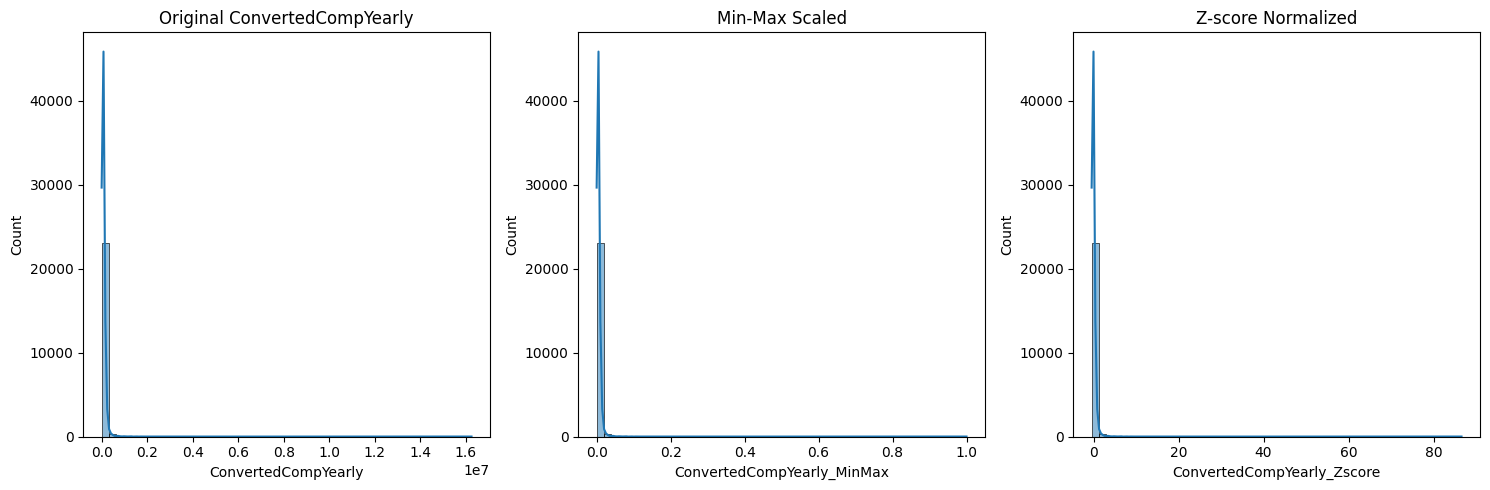

In [60]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/VYPrOu0Vs3I0hKLLjiPGrA/survey-data-with-duplicate.csv"
df = pd.read_csv(file_path)

# --- Perform normalization (if not already done) ---
# Min-Max Scaling
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df['ConvertedCompYearly_MinMax'] = scaler.fit_transform(df[['ConvertedCompYearly']])

# Z-score Normalization
df['ConvertedCompYearly_Zscore'] = (df['ConvertedCompYearly'] - df['ConvertedCompYearly'].mean()) / df['ConvertedCompYearly'].std()
# --- End of normalization ---


# Create histograms
plt.figure(figsize=(15, 5))

# Original 'ConvertedCompYearly'
plt.subplot(1, 3, 1)  # 1 row, 3 columns, first plot
sns.histplot(df['ConvertedCompYearly'], bins=50, kde=True)
plt.title('Original ConvertedCompYearly')

# Min-Max Scaled 'ConvertedCompYearly_MinMax'
plt.subplot(1, 3, 2)  # 1 row, 3 columns, second plot
sns.histplot(df['ConvertedCompYearly_MinMax'], bins=50, kde=True)
plt.title('Min-Max Scaled')

# Z-score Normalized 'ConvertedCompYearly_Zscore'
plt.subplot(1, 3, 3)  # 1 row, 3 columns, third plot
sns.histplot(df['ConvertedCompYearly_Zscore'], bins=50, kde=True)
plt.title('Z-score Normalized')

plt.tight_layout()
plt.show()

**Data Wrangling Lab**


In [61]:
!pip install pandas
!pip install matplotlib

In [62]:
# Import necessary libraries
import pandas as pd

# Load the Stack Overflow survey data
dataset_url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv"
df = pd.read_csv(dataset_url)

# Display the first few rows
print(df.head())

   ResponseId                      MainBranch                 Age  \
0           1  I am a developer by profession  Under 18 years old   
1           2  I am a developer by profession     35-44 years old   
2           3  I am a developer by profession     45-54 years old   
3           4           I am learning to code     18-24 years old   
4           5  I am a developer by profession     18-24 years old   

            Employment RemoteWork   Check  \
0  Employed, full-time     Remote  Apples   
1  Employed, full-time     Remote  Apples   
2  Employed, full-time     Remote  Apples   
3   Student, full-time        NaN  Apples   
4   Student, full-time        NaN  Apples   

                                    CodingActivities  \
0                                              Hobby   
1  Hobby;Contribute to open-source projects;Other...   
2  Hobby;Contribute to open-source projects;Other...   
3                                                NaN   
4                                 

In [63]:
import pandas as pd

# Load the dataset
file_path = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/VYPrOu0Vs3I0hKLLjiPGrA/survey-data-with-duplicate.csv"
df = pd.read_csv(file_path)

# Display basic information
print("Basic information about the dataset:")
print(df.info())

# Display summary statistics
print("\nSummary statistics:")
print(df.describe())

Basic information about the dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65457 entries, 0 to 65456
Columns: 114 entries, ResponseId to JobSat
dtypes: float64(13), int64(1), object(100)
memory usage: 56.9+ MB
None

Summary statistics:
         ResponseId      CompTotal       WorkExp  JobSatPoints_1  \
count  65457.000000   3.374400e+04  29664.000000    29330.000000   
mean   32714.493591  2.963490e+145     11.466323       18.578998   
std    18892.431636  5.443794e+147      9.168205       25.965347   
min        1.000000   0.000000e+00      0.000000        0.000000   
25%    16354.000000   6.000000e+04      4.000000        0.000000   
50%    32716.000000   1.100000e+05      9.000000       10.000000   
75%    49076.000000   2.500000e+05     16.000000       22.000000   
max    65437.000000  1.000000e+150     50.000000      100.000000   

       JobSatPoints_4  JobSatPoints_5  JobSatPoints_6  JobSatPoints_7  \
count    29399.000000    29417.000000    29456.000000    29454.000

In [64]:
import pandas as pd

# Load the dataset
file_path = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/VYPrOu0Vs3I0hKLLjiPGrA/survey-data-with-duplicate.csv"
df = pd.read_csv(file_path)

# Generate basic statistics for numerical columns
numerical_stats = df.describe()

# Display the statistics
print(numerical_stats)

         ResponseId      CompTotal       WorkExp  JobSatPoints_1  \
count  65457.000000   3.374400e+04  29664.000000    29330.000000   
mean   32714.493591  2.963490e+145     11.466323       18.578998   
std    18892.431636  5.443794e+147      9.168205       25.965347   
min        1.000000   0.000000e+00      0.000000        0.000000   
25%    16354.000000   6.000000e+04      4.000000        0.000000   
50%    32716.000000   1.100000e+05      9.000000       10.000000   
75%    49076.000000   2.500000e+05     16.000000       22.000000   
max    65437.000000  1.000000e+150     50.000000      100.000000   

       JobSatPoints_4  JobSatPoints_5  JobSatPoints_6  JobSatPoints_7  \
count    29399.000000    29417.000000    29456.000000    29454.000000   
mean         7.520604       10.059485       24.339971       22.964277   
std         18.421094       21.831924       27.088870       27.017634   
min          0.000000        0.000000        0.000000        0.000000   
25%          0.000000 

In [66]:
country_counts = df['Country'].value_counts()
print(country_counts)

Country
United States of America                                11099
Germany                                                  4949
India                                                    4232
United Kingdom of Great Britain and Northern Ireland     3227
Ukraine                                                  2672
                                                        ...  
Central African Republic                                    1
Equatorial Guinea                                           1
Niger                                                       1
Guinea                                                      1
Solomon Islands                                             1
Name: count, Length: 185, dtype: int64


In [67]:
import pandas as pd

# Load the dataset
file_path = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/VYPrOu0Vs3I0hKLLjiPGrA/survey-data-with-duplicate.csv"
df = pd.read_csv(file_path)

# Standardize 'Country' column
country_mapping = {
    'United States': 'United States',
    'USA': 'United States',
    'US': 'United States',
    # Add more mappings as needed
}
df['Country'] = df['Country'].map(country_mapping).fillna(df['Country'])

# Standardize 'EdLevel' column
edlevel_mapping = {
    "Bachelor’s degree (BA, BS, B.Eng., etc.)": "Bachelor's degree",
    "Master’s degree (MA, MS, M.Eng., MBA, etc.)": "Master's degree",
    # Add more mappings as needed
}
df['EdLevel'] = df['EdLevel'].map(edlevel_mapping).fillna(df['EdLevel'])

# Now, the 'Country' and 'EdLevel' columns should have standardized entries.
# You can verify this by checking unique values:
print(df['Country'].unique())
print(df['EdLevel'].unique())

['United States of America'
 'United Kingdom of Great Britain and Northern Ireland' 'Canada' 'Norway'
 'Uzbekistan' 'Serbia' 'Poland' 'Philippines' 'Bulgaria' 'Switzerland'
 'India' 'Germany' 'Ireland' 'Italy' 'Ukraine' 'Australia' 'Brazil'
 'Japan' 'Austria' 'Iran, Islamic Republic of...' 'France' 'Saudi Arabia'
 'Romania' 'Turkey' 'Nepal' 'Algeria' 'Sweden' 'Netherlands' 'Croatia'
 'Pakistan' 'Czech Republic' 'Republic of North Macedonia' 'Finland'
 'Slovakia' 'Russian Federation' 'Greece' 'Israel' 'Belgium' 'Mexico'
 'United Republic of Tanzania' 'Hungary' 'Argentina' 'Portugal'
 'Sri Lanka' 'Latvia' 'China' 'Singapore' 'Lebanon' 'Spain' 'South Africa'
 'Lithuania' 'Viet Nam' 'Dominican Republic' 'Indonesia' 'Kosovo'
 'Morocco' 'Taiwan' 'Georgia' 'San Marino' 'Tunisia' 'Bangladesh'
 'Nigeria' 'Liechtenstein' 'Denmark' 'Ecuador' 'Malaysia' 'Albania'
 'Azerbaijan' 'Chile' 'Ghana' 'Peru' 'Bolivia' 'Egypt' 'Luxembourg'
 'Montenegro' 'Cyprus' 'Paraguay' 'Kazakhstan' 'Slovenia' 'Jordan'
 

In [68]:
import pandas as pd

# Load the dataset
file_path = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/VYPrOu0Vs3I0hKLLjiPGrA/survey-data-with-duplicate.csv"
df = pd.read_csv(file_path)

# Perform one-hot encoding on 'Employment'
encoded_employment = pd.get_dummies(df['Employment'], prefix='Employment')

# Concatenate the encoded columns to the original DataFrame
df = pd.concat([df, encoded_employment], axis=1)

# Optionally, drop the original 'Employment' column
# df.drop('Employment', axis=1, inplace=True)

# Display the first few rows to check the results
print(df.head())


   ResponseId                      MainBranch                 Age  \
0           1  I am a developer by profession  Under 18 years old   
1           2  I am a developer by profession     35-44 years old   
2           3  I am a developer by profession     45-54 years old   
3           4           I am learning to code     18-24 years old   
4           5  I am a developer by profession     18-24 years old   

            Employment RemoteWork   Check  \
0  Employed, full-time     Remote  Apples   
1  Employed, full-time     Remote  Apples   
2  Employed, full-time     Remote  Apples   
3   Student, full-time        NaN  Apples   
4   Student, full-time        NaN  Apples   

                                    CodingActivities  \
0                                              Hobby   
1  Hobby;Contribute to open-source projects;Other...   
2  Hobby;Contribute to open-source projects;Other...   
3                                                NaN   
4                                 

In [69]:
import pandas as pd

# Load the dataset
file_path = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/VYPrOu0Vs3I0hKLLjiPGrA/survey-data-with-duplicate.csv"
df = pd.read_csv(file_path)

# Identify missing values for all columns
missing_values = df.isnull().sum()

# Sort columns by the number of missing values in descending order
missing_values = missing_values.sort_values(ascending=False)

# Display the columns with the highest number of missing values
print("Columns with the highest number of missing values:\n", missing_values.head())

Columns with the highest number of missing values:
 AINextMuch less integrated    64309
AINextLess integrated         63102
AINextNo change               52955
AINextMuch more integrated    52018
EmbeddedAdmired               48718
dtype: int64


In [70]:
import pandas as pd

# Load the dataset
file_path = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/VYPrOu0Vs3I0hKLLjiPGrA/survey-data-with-duplicate.csv"
df = pd.read_csv(file_path)

# Check for missing values in 'ConvertedCompYearly'
missing_comp = df['ConvertedCompYearly'].isnull().sum()
print(f"Missing values in 'ConvertedCompYearly': {missing_comp}")

# Handle missing values (if any) - Choose an appropriate method
# For example, impute with the median:
if missing_comp > 0:
    median_comp = df['ConvertedCompYearly'].median()
    df['ConvertedCompYearly'].fillna(median_comp, inplace=True)
    print(f"Missing values in 'ConvertedCompYearly' after imputation: {df['ConvertedCompYearly'].isnull().sum()}")
else:
    print("No missing values in 'ConvertedCompYearly'.")

# Now you can use 'ConvertedCompYearly' for compensation analysis.
# ... (Your analysis code here) ...

Missing values in 'ConvertedCompYearly': 42020
Missing values in 'ConvertedCompYearly' after imputation: 0


<ipython-input-70-a3b1e54991a2>:15: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['ConvertedCompYearly'].fillna(median_comp, inplace=True)


In [71]:
import pandas as pd

# Load the dataset
file_path = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/VYPrOu0Vs3I0hKLLjiPGrA/survey-data-with-duplicate.csv"
df = pd.read_csv(file_path)

# Get the most frequent value (mode) for 'RemoteWork'
most_frequent_remote_work = df['RemoteWork'].mode()[0]

# Impute missing values in 'RemoteWork' with the mode
df['RemoteWork'].fillna(most_frequent_remote_work, inplace=True)

# Verify the imputation by checking for missing values again
missing_remote_work_after_imputation = df['RemoteWork'].isnull().sum()
print(f"Missing values in 'RemoteWork' after imputation: {missing_remote_work_after_imputation}")

Missing values in 'RemoteWork' after imputation: 0


<ipython-input-71-721a6431e0aa>:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['RemoteWork'].fillna(most_frequent_remote_work, inplace=True)


In [72]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# Load the dataset
file_path = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/VYPrOu0Vs3I0hKLLjiPGrA/survey-data-with-duplicate.csv"
df = pd.read_csv(file_path)

# Create a MinMaxScaler object
scaler = MinMaxScaler()

# Fit the scaler to the 'ConvertedCompYearly' column
# and transform the data
df['ConvertedCompYearly_MinMax'] = scaler.fit_transform(
    df[['ConvertedCompYearly']]
)  # Reshape to a 2D array

# Display the first few rows with the normalized column
print(df[['ConvertedCompYearly', 'ConvertedCompYearly_MinMax']].head())

   ConvertedCompYearly  ConvertedCompYearly_MinMax
0                  NaN                         NaN
1                  NaN                         NaN
2                  NaN                         NaN
3                  NaN                         NaN
4                  NaN                         NaN


In [74]:
import pandas as pd

# Load the dataset
file_path = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/VYPrOu0Vs3I0hKLLjiPGrA/survey-data-with-duplicate.csv"
df = pd.read_csv(file_path)

# Define experience level bins and labels
experience_bins = [0, 3, 7, 15, float('inf')]  # Customize bins as needed
experience_labels = ['Entry-Level', 'Mid-Level', 'Senior', 'Expert']

# Convert 'YearsCodePro' to numeric, handling non-numeric values
def convert_to_numeric(value):
    try:
        return float(value)
    except ValueError:
        # Handle cases like 'Less than 1 year', 'More than 50 years', etc.
        if 'Less than' in value:
            return 0  # Or another appropriate value
        elif 'More than' in value:
            return 50  # Or another appropriate value
        else:
            return float('nan')  # Or handle differently

df['YearsCodePro_Numeric'] = df['YearsCodePro'].apply(convert_to_numeric)

# Create the 'ExperienceLevel' column using pd.cut with the numeric column
df['ExperienceLevel'] = pd.cut(df['YearsCodePro_Numeric'], bins=experience_bins, labels=experience_labels, include_lowest=True, right=False, duplicates='drop')

# Display the first few rows with the new column
print(df[['YearsCodePro', 'YearsCodePro_Numeric', 'ExperienceLevel']].head())

  YearsCodePro  YearsCodePro_Numeric ExperienceLevel
0          NaN                   NaN             NaN
1           17                  17.0          Expert
2           27                  27.0          Expert
3          NaN                   NaN             NaN
4          NaN                   NaN             NaN
